# Starbucks Review Analysis_NLP_BagOfWords_ML

In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [363]:
df = pd.DataFrame(pd.read_csv('reviews_data.csv'))
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


In [364]:
df.loc[40,'Review']

'Yet another person with a Horrible Experience at a Starbucks... Specifically, the Starbucks at Johnson Creek Crossing in Portland, Oregon. I was trying to give my order at the drive-thru, but apparently the person who was taking it couldn\'t hear me very well. A short, decaf vanilla mocha non-fat no-whip. Still, she had every thing right but the vanilla, so when she asked me if it was right, I said "Everything but the vanilla." She said she was having trouble hearing me, so I said loudly "Va-nil-la!" She said she was still having trouble hearing me, and for some unknown reason changed the drink to a grande vanilla latte, so I said loudly "Moch-a!" and then asked her why she changed the drink/size? She said she more about not being able to hear me, so in a very loud voice I said "SHORT... DECAF... VANILLA... MOCHA.. NONFAT... NO WHIP" At which point she said I was treating her badly and refused to take my order. '

In [365]:
#check for missing values

df.isnull().any()

# we can dig alittle more before decicing what to do with the missing values in Rating 
#because some people gave comments with no rating and some rating with no comment

name           False
location       False
Date           False
Rating          True
Review         False
Image_Links    False
dtype: bool

In [366]:
#Drop rows with neither rating nor review

nan_index = df[(df['Rating'].isnull())&(df['Review']=='No Review Text')].index
df = df.drop(index = nan_index)

In [367]:
# check for duplicated rows
df[df.duplicated()]

,name,location,Date,Rating,Review,Image_Links


In [368]:
# create a column locating the State at which the review was on

df['state'] = [x[-2:] for x in df['location']]
df['city'] = [x[:-4] for x in df['location']]

df.head()

,name,location,Date,Rating,Review,Image_Links,state,city
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],TX,Wichita Falls
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],FL,Apopka
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,PA,Cranberry Twp
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],WA,Seattle
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,OR,Gresham


In [369]:
# Create a column of the date the review was provided, in DateTime
df['Date_new'] = [x[8:] for x in df['Date']]
df['Date_new']= pd.to_datetime(df['Date_new'])

In [370]:
# no need to keep the original Date and image links column
df.drop(columns=['Date', 'Image_Links','location'], inplace=True)

In [371]:
#Change all state abbrev. to caps
df['state'] = [x.upper() for x in df['state']]

In [373]:
# ML model do not take NaN values, drop rows with NaN now to fit models
df.dropna(how='any', axis=0, inplace=True)

## Exploratory Data Analysis

In [374]:
# How is the rating distribution like within the dataset?

import plotly.express as px

fig = px.pie(df, names='Rating', title='Ratings distribution in dataset')
fig.show()



# More than 50% of the ratings in this dataset gave a score 1 rating. 

In [375]:
# how is the rating distributed among the States?

#method1:
# plt.figure(figsize=(10,4))
# sns.scatterplot(data=df, x='state', y=df.index, hue='Rating',s=7)
# plt.ylabel('ID')
# plt.xlabel('State')
# plt.title('Ratings across each US State')
# plt.xticks(rotation=90, size=7)
# plt.show()

#method2:

fig = px.bar(df,
            x=df['state'].value_counts().head(10).index,
            y=df['state'].value_counts().head(10).values,
            labels={'x': 'State', 'y': '# of reviews'},
            title ='Review contributions by State')
fig.show()


# California had the highest number of ratings

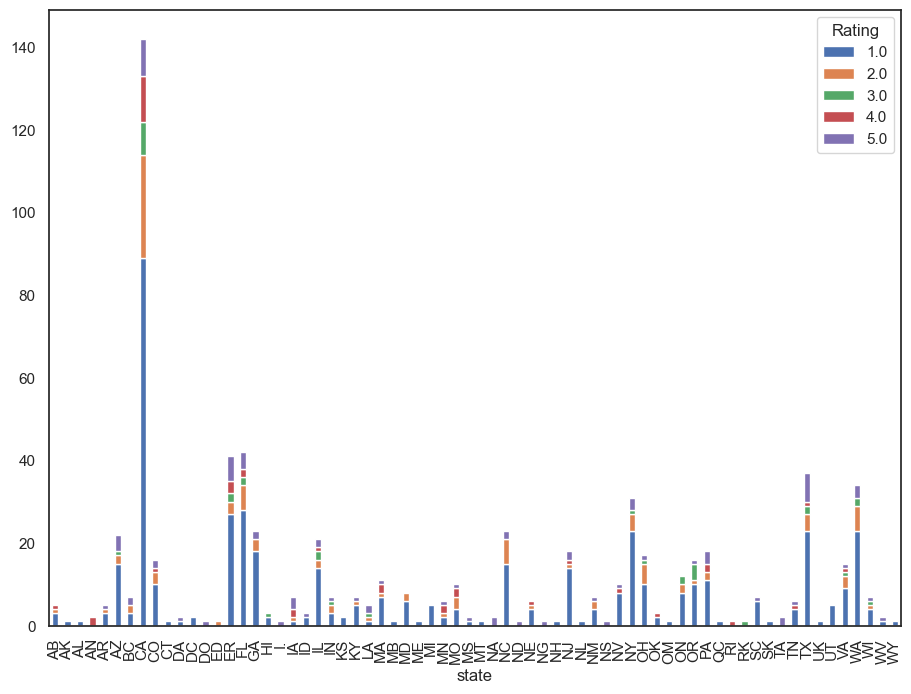

In [376]:
crosstb = pd.crosstab(df['state'], df['Rating'])

crosstb.plot(kind="bar", stacked=True, rot=0)
plt.xticks(rotation=90)
plt.show()

In [377]:
# top 10 cities contributing review

top10city = df['city'].value_counts().head(10)

df_top10city = pd.DataFrame({'city_name': top10city.index,
                             'frequency': top10city.values})

fig = px.bar(df_top10city, x='city_name',y='frequency', color='city_name',
            labels={'city_name': 'city name','frequency':'# of reviews'})

fig.show()
                            

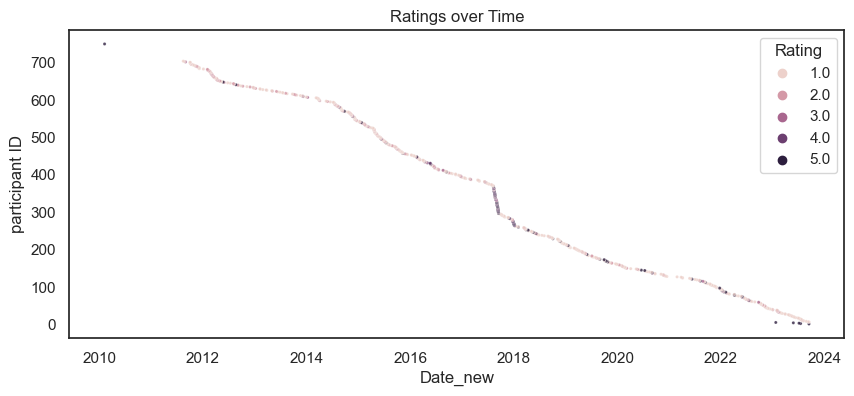

In [378]:
# How is the rating distributed over time?
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Date_new', y=df.index, hue='Rating', s=5, alpha=0.8)
plt.ylabel('participant ID')
plt.title('Ratings over Time')
plt.show()

# Sometime within 2017 is when the majority of higher scores were reviewed. What happened in 2017 for Starbucks?

In [379]:
df_2017 = df[(df['Date_new']>'2017-01-01')&(df['Date_new']<'2017-12-31')]
df_2018 = df[(df['Date_new']>'2018-01-01')&(df['Date_new']<'2018-12-31')]


print('ALL', df.groupby('Rating').count())
print('2017', df_2017.groupby('Rating').count())
print('2018', df_2018.groupby('Rating').count())

ALL         name  Review  state  city  Date_new
Rating                                     
1.0      451     451    451   451       451
2.0       99      99     99    99        99
3.0       33      33     33    33        33
4.0       39      39     39    39        39
5.0       83      83     83    83        83
2017         name  Review  state  city  Date_new
Rating                                     
1.0       44      44     44    44        44
2.0        3       3      3     3         3
3.0       13      13     13    13        13
4.0       29      29     29    29        29
5.0       34      34     34    34        34
2018         name  Review  state  city  Date_new
Rating                                     
1.0       38      38     38    38        38
2.0        4       4      4     4         4
4.0        3       3      3     3         3
5.0        9       9      9     9         9


## Bag Of Words - sentiment analysis and ML models

In [380]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['Review'])

/Users/liuanamnannan/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Rating'], test_size=0.1, random_state=29)

### SVM

In [382]:
from sklearn import svm

svm_clf = svm.SVC()
svm_model = svm_clf.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.6338028169014085

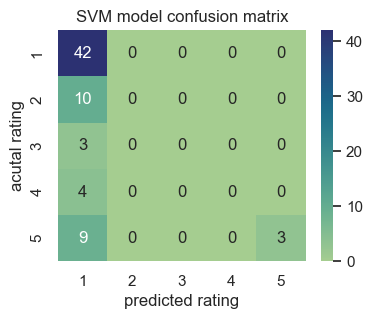

In [383]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(4,3))
svm_cm = confusion_matrix(y_test, svm_model.predict(X_test))
sns.heatmap(svm_cm, cmap='crest', xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5], annot=True)
plt.xlabel('predicted rating')
plt.ylabel('acutal rating')
plt.title('SVM model confusion matrix')
plt.show()

### Multinomial Naive Bayes

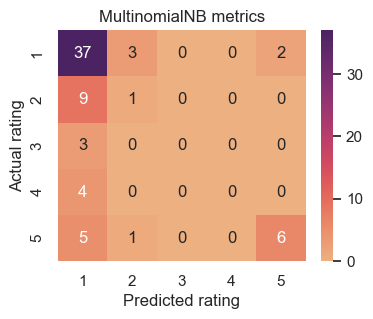

In [384]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB(force_alpha=True)
mnb_model = mnb_clf.fit(X_train, y_train)
mnb_model.score(X_test, y_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, mnb_model.predict(X_test)),xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5], cmap='flare', annot=True)
plt.title('MultinomialNB metrics')
plt.xlabel('Predicted rating')
plt.ylabel('Actual rating')
plt.show()

## Analysis:

results:

For both SVM and multinomial NB models, predictions are most significant for score 1 reviews, however when scores should be 2,3,4, ther is a 0% accuracy and they were all predicted to be score 1 as well. Score 5 was less than 50% accurately predict while all wrong prections fell into score 1.

This is not a good data set for fitting into a model becasue ratings are heavily skewed towards scores of 1. Which may be :
1. an indicator that overall there just are more disappointing reviews than satisfactory ones
2. an indicator that the raw data was collected with bias and this dataset does not represent the true unbiased and objective review of Starbucks

As a result, SVM and multinomial NB model both predict ratings of 1 much more effectively than other scores

### Solution: SMOTE will not work here because it does not work with text data and the bag of words approach will generate high dimentions matrix that SMOTE can not handle, suggestions:

1. find more reviews that are higher scored
2. manually and randomlly generate more high scored ratings

keep in mind that the above methods are for the purpose of creating a model that can predict the score of a review, but in no way represent the satisfactory level to the starbucks coffee company